In [1]:
%matplotlib inline
import numpy as np
import numpy.ma as ma
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns
import timeit
import line_profiler

import datetime

from io import StringIO
from pandas.api.types import CategoricalDtype

import pandas._testing as tm

## returns df from string data
def g(data):
    return pd.read_csv(StringIO(data))

In [2]:
s = pd.Series(['a','b','c','a'], dtype='category')
s

0    a
1    b
2    c
3    a
dtype: category
Categories (3, object): ['a', 'b', 'c']

In [8]:
df = pd.DataFrame({'A':['a','b','c','a']})
df["B"] = df.A.astype('category')
df.B.dtypes

CategoricalDtype(categories=['a', 'b', 'c'], ordered=False)

In [12]:
pd.cut(np.array([1,2,3]), 3)
# range is 1-3 i.e 2 therefore 2/3 = 0.667 hence 1.-1.667-2.33,3.

[(1.996, 3.333], (3.333, 4.667], (4.667, 6.0]]
Categories (3, interval[float64]): [(1.996, 3.333] < (3.333, 4.667] < (4.667, 6.0]]

In [24]:
df = pd.DataFrame({"value": np.arange(10,101,10)})
labels = [f'{i} - {i+9}'for i in range(10,101,10)]
df['group'] = pd.cut(df.value, range(0,105,10), right=False, labels=labels)
df

,value,group
0,10,20 - 29
1,20,30 - 39
2,30,40 - 49
3,40,50 - 59
4,50,60 - 69
5,60,70 - 79
6,70,80 - 89
7,80,90 - 99
8,90,100 - 109
9,100,NaN


In [28]:
df = pd.DataFrame({"value": np.random.randint(0, 100, 20)})
labels = ["{0} - {1}".format(i, i + 9) for i in range(0, 100, 10)]
df["group"] = pd.cut(df.value, range(0, 105, 10), right=False, labels=labels)
df

,value,group
0,42,40 - 49
1,99,90 - 99
2,39,30 - 39
3,45,40 - 49
4,6,0 - 9
5,60,60 - 69
6,49,40 - 49
7,90,90 - 99
8,53,50 - 59
9,43,40 - 49


In [33]:
raw_cat = pd.Categorical(["a", "b", "c", "a"], categories=["b", "c", "d"], ordered=False)
s = pd.Series(raw_cat)
df = pd.DataFrame({"A": ["a", "b", "c", "a"]})
df['B'] = raw_cat
df

,A,B
0,a,NaN
1,b,b
2,c,c
3,a,NaN


In [111]:
splitter = np.random.choice([0, 1], 5, p=[0.4, 0.6])
s = pd.Series(pd.Categorical.from_codes(splitter, 
                            categories=["train", "test"]))
s

0     test
1    train
2     test
3     test
4     test
dtype: category
Categories (2, object): ['train', 'test']

# 2.12.2 CategoricalDtype

In [4]:
from pandas.api.types import CategoricalDtype

CategoricalDtype(['a','b','c']) # CategoricalDtype(categories=['a', 'b', 'c'], ordered=False)
CategoricalDtype(["a", "b", "c"], ordered=True) # CategoricalDtype(categories=['a', 'b', 'c'], ordered=True)
CategoricalDtype()

CategoricalDtype(categories=None, ordered=False)

In [9]:
CategoricalDtype('a b c'.split(), ordered=False)
# Equal, since order is not considered when ordered=False
CategoricalDtype('b a c'.split(), ordered=False)

# Unequal, since the second CategoricalDtype is ordered
CategoricalDtype('b a c'.split(), ordered=True)

CategoricalDtype(categories=['b', 'a', 'c'], ordered=True)

In [14]:
cat = pd.Categorical(['a', 'c', 'c', np.nan], categories=['b','a', 'c'])
df = pd.DataFrame({
    'cat':cat,
    's':['a','c','c',np.nan]
})
df

,cat,s
0,a,a
1,c,c
2,c,c
3,NaN,NaN


In [26]:
c=CategoricalDtype(['a','b','c'], True)
s = pd.Series(['a','b','c'], dtype=c)
s.cat.categories
#s.cat.ordered
#c= None
#s

Index(['a', 'b', 'c'], dtype='object')

In [29]:
s = pd.Series(pd.Categorical(['a','b','c'], categories=['b','c','a']))
s.cat.categories
s.cat.ordered

False

In [35]:
s = pd.Series(list("babc")).astype(CategoricalDtype(list("abcd")))
s.cat.categories # Index(['a', 'b', 'c', 'd'], dtype='object')
s.unique() # ['b', 'a', 'c']

['b', 'a', 'c']
Categories (3, object): ['b', 'a', 'c']

In [43]:
s=pd.Series(['a','b','c','a'], dtype='category')
s.cat.categories = [f'Group {i}'for i in s.cat.categories]
s = s.cat.rename_categories(['Ramesh', 'Suresh', 'Chandu'])
s = s.cat.rename_categories({'Ramesh':'R', 'Suresh':'S', 'Chandu':'C'})


In [47]:
try:
    s.cat.categories = [1,1,1]
except ValueError as e:
    print('ValueError', str(e)) # ValueError Categorical categories must be unique

ValueError Categorical categories must be unique


In [52]:
s = s.cat.add_categories(5)
s.cat.categories

Index(['R', 'S', 'C', 4, 5], dtype='object')

In [54]:
s = pd.Series(pd.Categorical(['a','b','a'], categories=['a','b','c','d']))
s.cat.remove_unused_categories()

0    a
1    b
2    a
dtype: category
Categories (2, object): ['a', 'b']

In [55]:
s = pd.Series(["one", "two", "four", "-"], dtype="category")
s = s.cat.set_categories(["one", "two", "three", "four"])
s

0     one
1     two
2    four
3       -
dtype: category
Categories (4, object): ['-', 'four', 'one', 'two']

In [60]:
s = pd.Series(pd.Categorical(["a", "b", "c", "a"], ordered=False))
s.sort_values(inplace=True)
s.min() # TypeError: Categorical is not ordered for operation min

s = pd.Series(pd.Categorical(["a", "b", "c", "a"], ordered=True))
s.sort_values(inplace=True)
s.min() # 'a'


'a'

In [10]:
s = pd.Series([1,2,3,1], dtype='category')
s = s.cat.reorder_categories([2,3,1], ordered=True)
s.sort_values(inplace=True)
s.min(), s.max()

(2, 1)

In [14]:
df = pd.DataFrame({
    "A":pd.Categorical(list('bbeebbaa'), 
                       categories=['e','a','b'], ordered=True),
    "B": [1, 2, 1, 2, 2, 1, 2, 1],
})
df.sort_values(["A", "B"])
df['A'] = df.A.cat.reorder_categories(["a", "b", "e"])
df.sort_values(["A", "B"])

,A,B
7,a,1
6,a,2
0,b,1
5,b,1
1,b,2
4,b,2
2,e,1
3,e,2


In [23]:
s = pd.Series(["foo", "bar"] * 2)
s.nbytes # 32
s.astype('category').nbytes # 20

20

In [32]:
s = pd.Series(["foo%04d" %i for i in range(2)])
s.nbytes # 16
s.astype('category').nbytes # 18

18

In [36]:
s = pd.Series(np.repeat(['R','S','C'], 3))
s.nbytes # 72 ~ 9 elements 8 bytes
s.astype('category').nbytes # 33 ~ 3 unique elements - 24 + 9 elements 1

33

In [42]:
df = pd.DataFrame({
    "a": [1, 2, 3, 4],
    "b": ["a", "b", "c", "d"],
    "cats": [1, 2, 3, 2],
})
df.cats = df.cats.astype('category')
df.apply(lambda row: type(row["cats"]), axis=1)
df.apply(lambda col: col.dtype, axis=0)

a          int64
b         object
cats    category
dtype: object

# Visualization

In [43]:
import matplotlib.pyplot as plt
plt.close('all')

<AxesSubplot:>

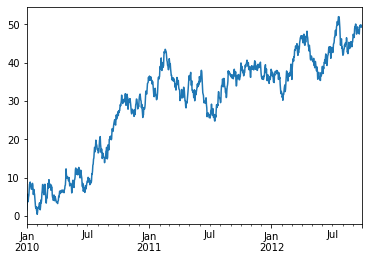

In [47]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('2010.01.01', periods=1000))
ts = ts.cumsum()
ts.plot()

<AxesSubplot:>

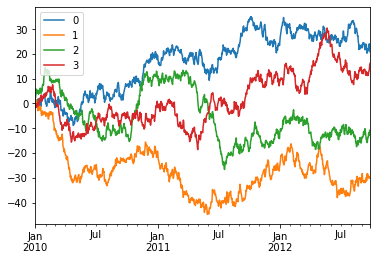

In [51]:
df = DataFrame(np.random.randn(1000, 4), index=pd.date_range(
                '2010.01.01', periods=1000))
df = df.cumsum()
df.plot()

<AxesSubplot:xlabel='C'>

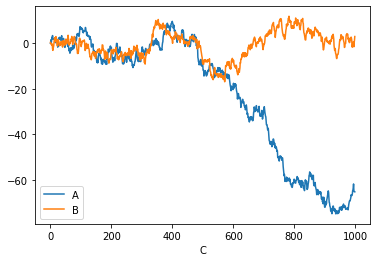

In [56]:
df = pd.DataFrame(np.random.randn(1000,2), columns=['A','B']).cumsum()
df['C'] = pd.Series(range(len(df)))
df.plot(x='C', y=['A', 'B'])

<AxesSubplot:ylabel='Frequency'>

<Figure size 432x288 with 0 Axes>

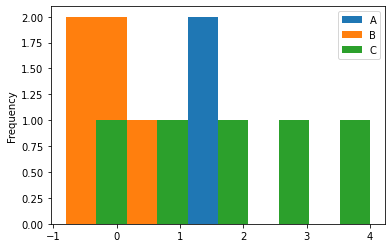

In [60]:
plt.figure()
df.iloc[:5].plot(kind='hist')

<AxesSubplot:>

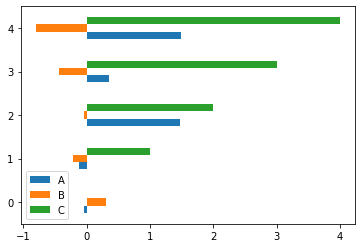

In [63]:
df.iloc[:5].plot.barh()

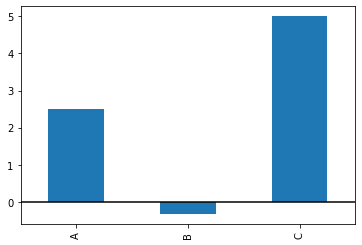

In [69]:
plt.figure()
df.iloc[5].plot.bar()
plt.axhline(0, color='k')

<AxesSubplot:>

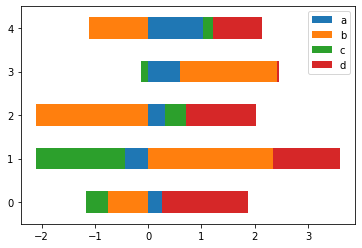

In [75]:
df2 = DataFrame(np.random.randn(5, 4), columns=list('abcd'))
df2.plot.barh(stacked=True)

<AxesSubplot:ylabel='Frequency'>

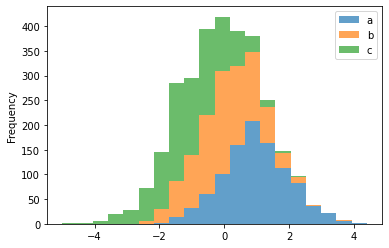

In [89]:
df4 = pd.DataFrame(
   {
         "a": np.random.randn(1000) + 1,
         "b": np.random.randn(1000),
         "c": np.random.randn(1000) - 1,
     },
     columns=["a", "b", "c"],
 )
df4.plot.hist(alpha=.7, stacked=True, bins=20)

<AxesSubplot:ylabel='Frequency'>

<Figure size 432x288 with 0 Axes>

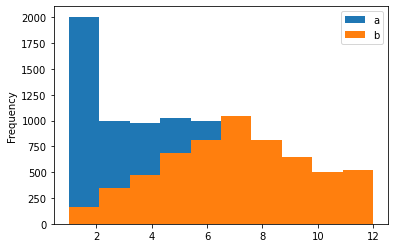

In [104]:
plt.figure()
df = pd.DataFrame({
    'a':pd.Series(np.random.randint(1,7,6000))
})
df['b'] = df['a'] + np.random.randint(1, 7, 6000)
df.plot.hist()

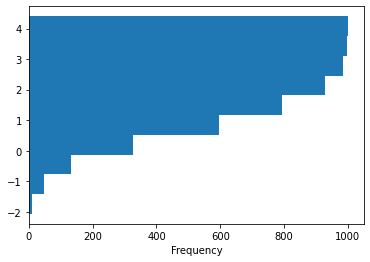

In [90]:
df4["a"].plot.hist(orientation="horizontal", cumulative=True);

<AxesSubplot:>

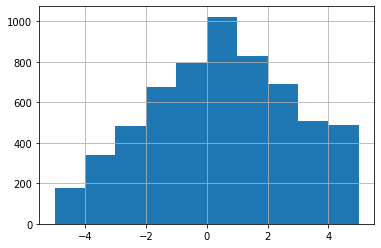

In [110]:
plt.figure();
df.a.diff().hist()

array([[<AxesSubplot:title={'center':'a'}>,
        <AxesSubplot:title={'center':'b'}>]], dtype=object)

<Figure size 432x288 with 0 Axes>

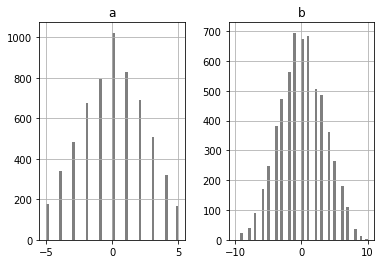

In [115]:
plt.figure();
df.diff().hist(color='k', alpha=0.5, bins=50)

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>]], dtype=object)

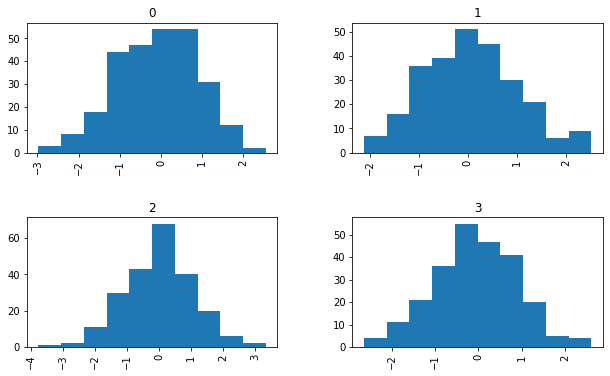

In [121]:
data = pd.Series(np.random.randn(1000))
data.hist(by=np.random.randint(0,4,1000), figsize=(10,6))

<AxesSubplot:>

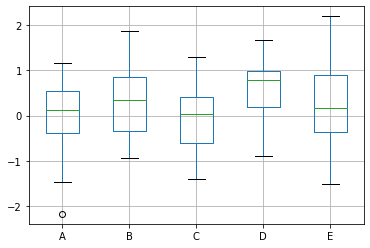

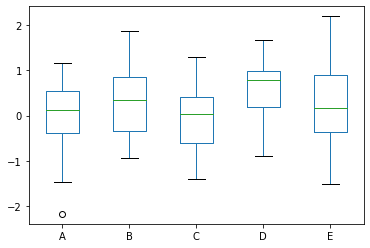

In [4]:
df = pd.DataFrame(np.random.randn(10, 5), columns=list('ABCDE'))
df.boxplot()
df.plot.box()

<AxesSubplot:>

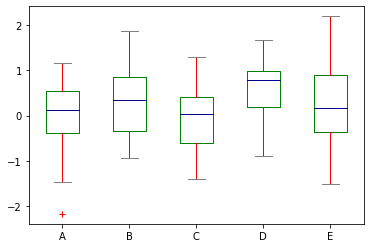

In [14]:
color = {
    'caps' : 'gray',
    'whiskers' : 'red',
    'boxes' : 'green',
    'medians' : 'DarkBlue'
}
df.plot.box(color=color, sym="r+")

<AxesSubplot:>

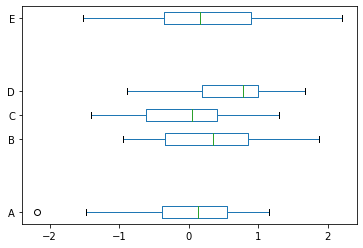

In [19]:
df.plot.box(vert=False, positions=[1, 4, 5, 6, 9])

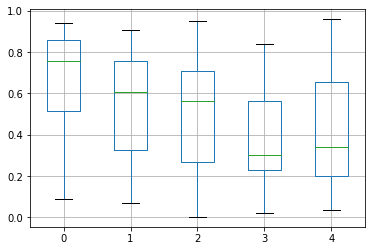

In [24]:
df = pd.DataFrame(np.random.rand(10, 5))
bp = df.boxplot()

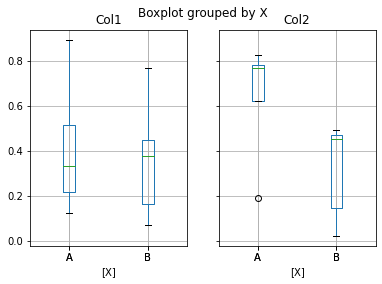

In [27]:
df = pd.DataFrame(np.random.rand(10, 2), columns=["Col1", "Col2"])
df["X"] = pd.Series(["A", "A", "A", "A", "A", "B", "B", "B", "B", "B"])
bp = df.boxplot(by='X')

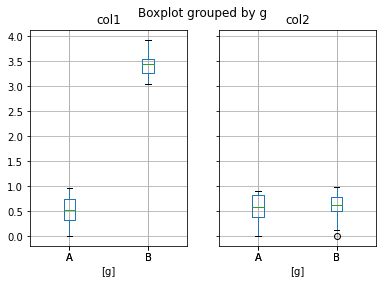

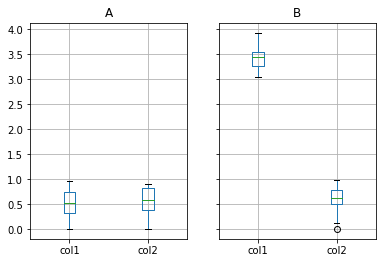

In [35]:
np.random.seed(1234)
df_box = pd.DataFrame(np.random.rand(50, 2), columns=['col1', 'col2'])
df_box["g"] = np.random.choice(["A", "B"], size=50)
df_box.loc[df_box["g"] == "B", "col1"] += 3
bp = df_box.boxplot(by="g")
bp = df_box.groupby("g").boxplot()

<AxesSubplot:>

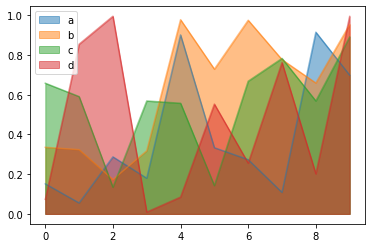

In [37]:
df = pd.DataFrame(np.random.rand(10, 4), columns=["a", "b", "c", "d"])
df.plot.area(stacked=False)

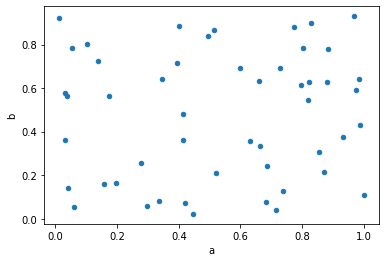

In [38]:
df = pd.DataFrame(np.random.rand(50, 4), columns=["a", "b", "c", "d"])
df.plot.scatter(x="a", y="b");

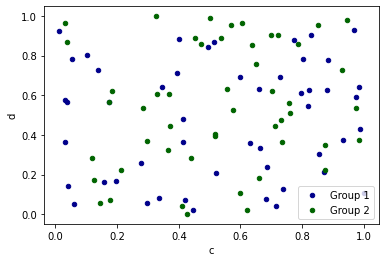

In [39]:
ax = df.plot.scatter(x="a", y="b", color="DarkBlue", label="Group 1")
df.plot.scatter(x="c", y="d", color="DarkGreen", label="Group 2", ax=ax);

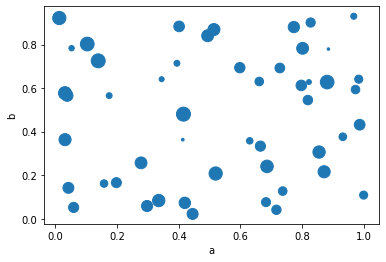

In [41]:
df.plot.scatter(x="a", y="b", s=df["c"] * 200);

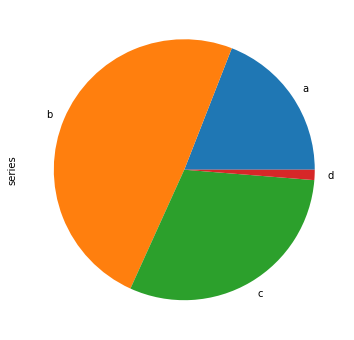

In [43]:
series = pd.Series(3 * np.random.rand(4), index=["a", "b", "c", "d"], name="series")
series.plot.pie(figsize=(6, 6));

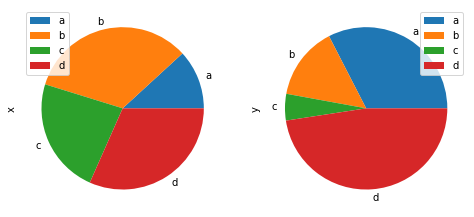

In [45]:
df = pd.DataFrame(3 * np.random.rand(4, 2), 
                  index=["a", "b", "c", "d"], columns=["x", "y"])
df.plot.pie(subplots=True, figsize=(8, 4));

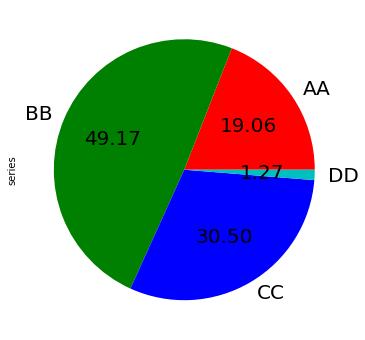

In [46]:
series.plot.pie(
   labels=["AA", "BB", "CC", "DD"],
   colors=["r", "g", "b", "c"],
   autopct="%.2f",
   fontsize=20,
   figsize=(6, 6),
   );

/Users/utsav/.conda/envs/myenv/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1583: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


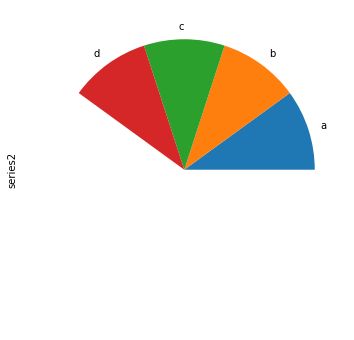

In [47]:
series = pd.Series([0.1] * 4, index=["a", "b", "c", "d"], name="series2")
series.plot.pie(figsize=(6, 6))